In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

In [2]:
df=pd.read_csv('monthly_price.csv')

In [3]:
df.head()

,Date,Price
0,1/31/2000,219.942449
1,2/29/2000,275.117647
2,3/31/2000,263.198203
3,4/30/2000,253.428767
4,5/31/2000,215.742602


In [4]:
#checking of the info of file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    72 non-null     object 
 1   Price   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [6]:
df

,Date,Price,Year,Month
0,2000-01-31,219.942449,2000,1
1,2000-02-29,275.117647,2000,2
2,2000-03-31,263.198203,2000,3
3,2000-04-30,253.428767,2000,4
4,2000-05-31,215.742602,2000,5
...,...,...,...,...
67,2005-08-31,305.240185,2005,8
68,2005-09-30,315.102514,2005,9
69,2005-10-31,323.380634,2005,10
70,2005-11-30,334.474315,2005,11


In [7]:
df['Date'] = df['Date'].astype(str)  # Convert 'Date' column to string
for index, row in df.iterrows():
    df.at[index, 'Date'] = f"{row['Year']}.{row['Month']}"



In [8]:
df.head()

,Date,Price,Year,Month
0,2000.1,219.942449,2000,1
1,2000.2,275.117647,2000,2
2,2000.3,263.198203,2000,3
3,2000.4,253.428767,2000,4
4,2000.5,215.742602,2000,5


In [9]:
df.dtypes

Date      object
Price    float64
Year       int32
Month      int32
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format


C:\Users\hp\AppData\Local\Temp\ipykernel_27228\2217953666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    72 non-null     datetime64[ns]
 1   Price   72 non-null     float64       
 2   Year    72 non-null     int32         
 3   Month   72 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 1.8 KB


In [12]:
df['Date'] = df['Date'].dt.to_period('m')

C:\Users\hp\AppData\Local\Temp\ipykernel_27228\1289122757.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df['Date'] = df['Date'].dt.to_period('m')


In [13]:
df.dtypes

Date     period[M]
Price      float64
Year         int32
Month        int32
dtype: object

In [14]:
first_series=pd.DataFrame({'Date':pd.date_range('12,15,2017',periods=20,
                                                freq='H'),'Count':list(range(20))},columns=['Date','Count'])

C:\Users\hp\AppData\Local\Temp\ipykernel_27228\3467156400.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  first_series=pd.DataFrame({'Date':pd.date_range('12,15,2017',periods=20,


In [15]:
first_series.head()

,Date,Count
0,2017-12-01 00:00:00,0
1,2017-12-01 01:00:00,1
2,2017-12-01 02:00:00,2
3,2017-12-01 03:00:00,3
4,2017-12-01 04:00:00,4


In [16]:

rolling_window_5=df.rolling(window=5)

<Axes: >

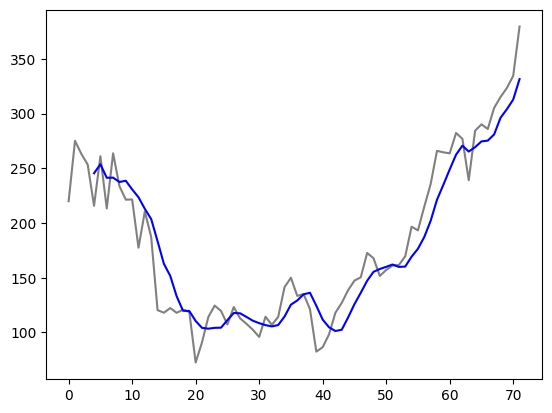

In [17]:
import warnings
warnings.filterwarnings('ignore')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Price'].plot(color='gray')


rolling_window_5 = df['Price'].rolling(window=5)

rolling_window_5.mean().plot(color='blue')


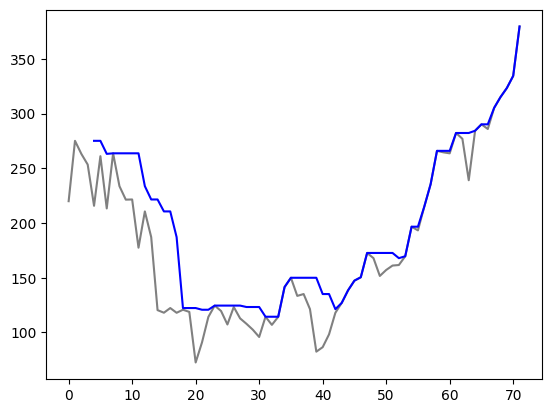

In [19]:
#in timeseries analysis the rolling function is used to calculate the rolling or moving statistics such as moving average

df['Price'].plot(color='gray')


rolling_window_5 = df['Price'].rolling(window=5)
rolling_window_5.max().plot(color='blue')

plt.show()

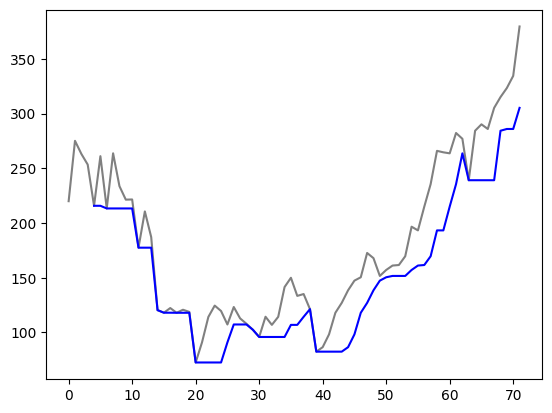

In [20]:

df['Price'].plot(color='gray')


rolling_window_5 = df['Price'].rolling(window=5)
rolling_window_5.min().plot(color='blue')


plt.show()

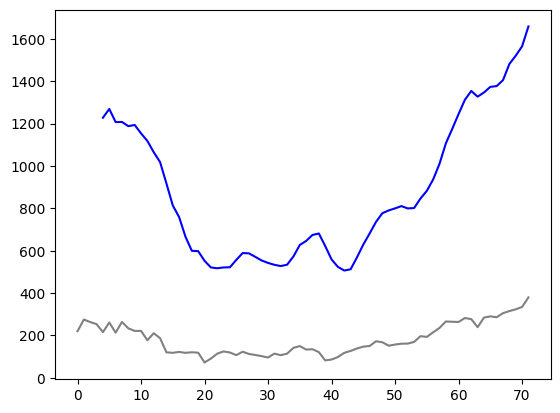

In [21]:

df['Price'].plot(color='gray')


rolling_window_5 = df['Price'].rolling(window=5)

rolling_window_5.sum().plot(color='blue')


plt.show()

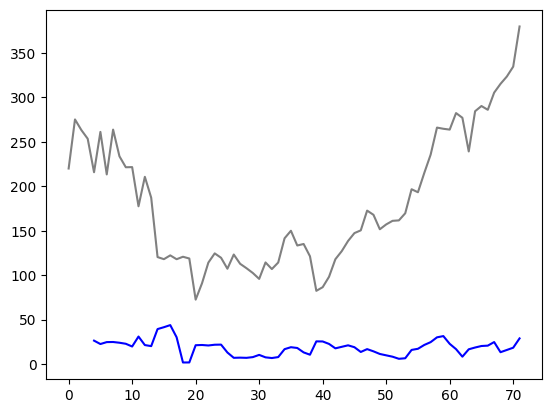

In [22]:


df['Price'].plot(color='gray')


rolling_window_5 = df['Price'].rolling(window=5)
rolling_window_5.std().plot(color='blue')


plt.show()

In [24]:

rolling_window_10=df.rolling(window=10)

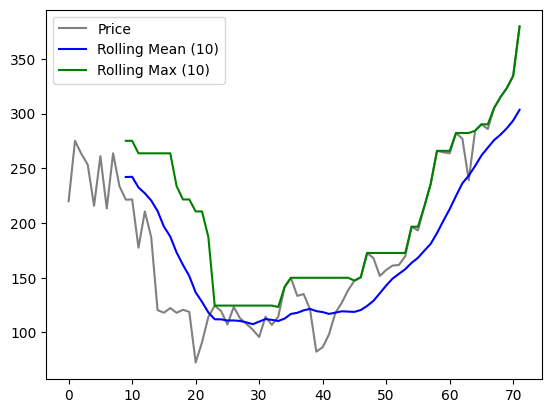

In [27]:


df['Price'].plot(color='gray')

rolling_window_10.mean().plot(color='blue', label='Rolling Mean (10)')

rolling_window_10.max().plot(color='green', label='Rolling Max (10)')


plt.legend()


plt.show()